# LDA-SVM

In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")
#train_data.head()

In [55]:
#adding noise
import math


mean = 0
variance = 0

for column in train_data.drop(['target','Tset'],axis=1):
        noise = np.random.normal(mean,variance,len(train_data))
        train_data[column] += noise

#train_data

Text(0.5, 1.0, 'Training data')

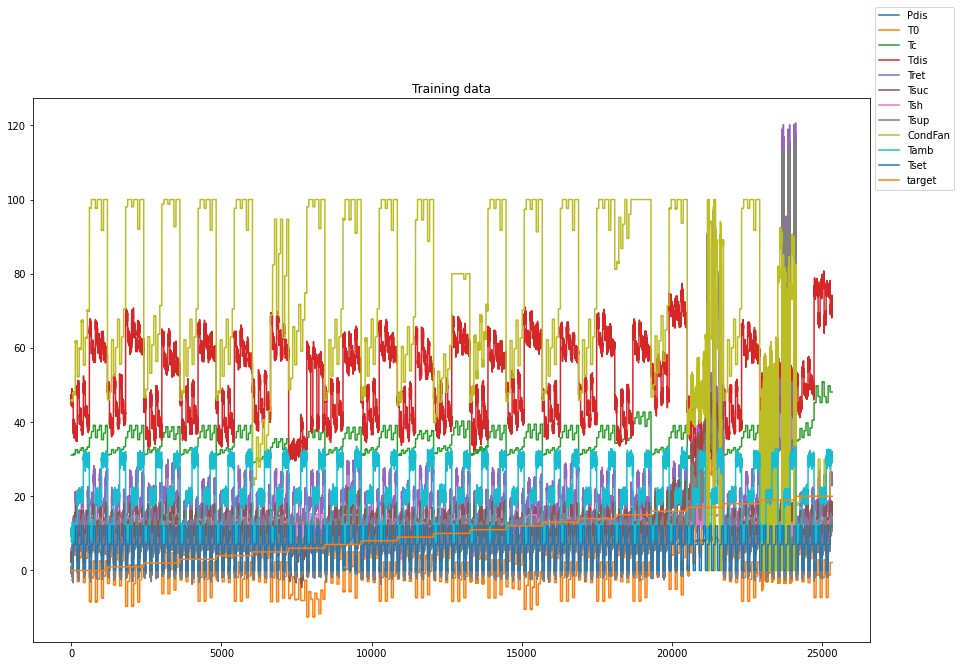

In [67]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data)
plt.legend(train_data.keys(), bbox_to_anchor=(1, 1), loc="center left")
plt.title('Training data')

In [57]:
#standardization
standardize = False

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data).drop('target',axis=1)
    tst = standardizer.transform(test_data).drop('target',axis=1)
else:
    trn = train_data.drop('target',axis=1)
    tst = test_data.drop('target',axis=1)

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset
0,7.954215,-2.569251,31.125977,46.922323,5.972245,2.244169,5.713611,0.034324,45.844190,11.201450,0
1,7.952997,-2.563472,31.120603,47.188326,5.987760,3.370428,5.706512,0.528092,45.784479,10.845152,0
2,7.953951,-2.567775,31.124811,46.838426,5.291379,4.852237,5.712030,-0.921267,45.831238,10.279254,0
3,7.953952,-2.567782,31.124818,44.456673,4.803767,4.890084,5.712038,0.983700,45.831306,11.466361,0
4,7.953961,-2.567826,31.124854,47.634709,5.223876,2.803388,5.712088,-0.374392,45.831712,8.731138,0
...,...,...,...,...,...,...,...,...,...,...,...
25321,12.565629,2.125283,48.114939,69.039790,24.215215,15.486366,14.425225,12.378696,30.000000,30.583201,12
25322,12.566055,2.123565,48.116274,71.281598,23.448108,17.126394,14.426687,11.864917,30.000000,30.203115,12
25323,12.564502,2.130099,48.111409,71.609517,24.078922,17.207027,14.421240,12.277210,30.000000,28.999814,12
25324,12.563996,2.132451,48.109823,70.355297,23.783048,16.246823,14.419369,12.155844,30.000000,31.869394,12


# LDA    

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=5)
clf.fit(trn,labels_trn)
LDA = clf.transform(trn)

LDA_tst = clf.transform(tst)

LDA

array([[-3.65024040e-02, -1.69758085e-01, -7.12129896e-01,
        -3.19234334e-01, -2.81043729e-02],
       [-7.83128490e-02, -2.14799933e-01, -7.60146995e-01,
        -3.02155004e-01, -1.24413333e-03],
       [ 1.62163255e-02, -3.28292706e-01, -5.09758076e-01,
        -3.14955846e-01, -7.48723846e-02],
       ...,
       [ 1.04788949e+01, -3.79365304e+00, -1.47412858e-01,
        -6.07069257e-01,  1.51287917e+00],
       [ 1.06187858e+01, -3.41293930e+00,  1.61133334e-01,
        -4.70193320e-01,  1.56255053e+00],
       [ 1.05772724e+01, -3.68324622e+00, -7.91555367e-02,
        -9.03997794e-01,  1.41191922e+00]])

<Figure size 432x288 with 0 Axes>

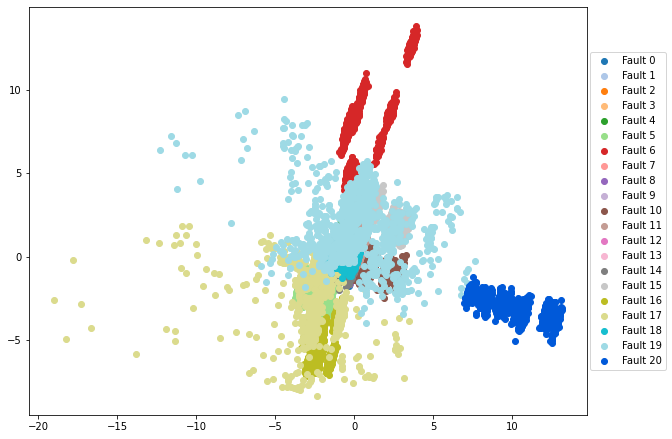

In [59]:
import plot_functions as pf

pf.plot_transformation(pd.DataFrame(LDA).assign(target=train_data['target']),'LDA_data.pdf','target',True)

# SVM

In [60]:
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)#kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf_svm.fit(LDA, labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

In [61]:
#clf_svm.score(LDA,labels_trn)
predict = clf_svm.predict(LDA)

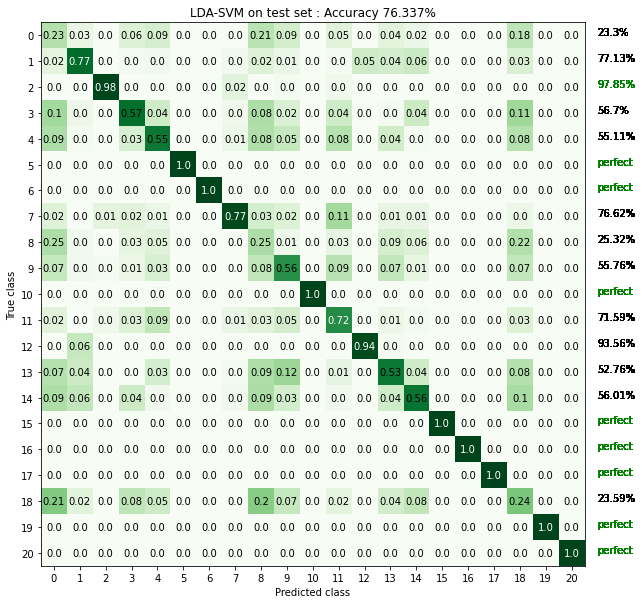

In [68]:
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on test set',save_fig_name='PDF/LDA-SVM confusion matrix.pdf')
pass

In [63]:
predict_tst = clf_svm.predict(LDA_tst)


<Figure size 432x288 with 0 Axes>

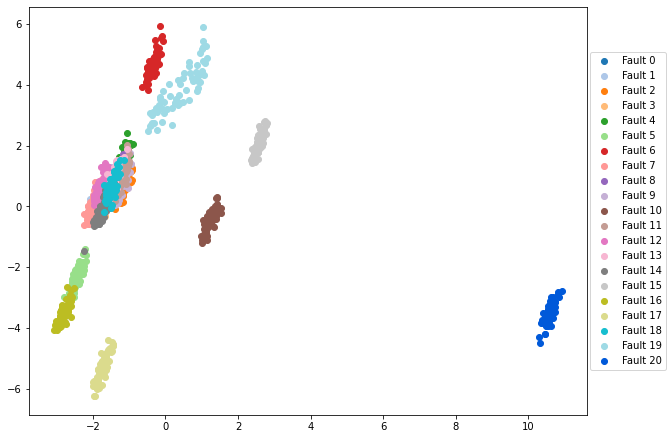

In [64]:
pf.plot_transformation(pd.DataFrame(LDA_tst).assign(target=test_data['target']),'LDA_val.pdf','target',True)

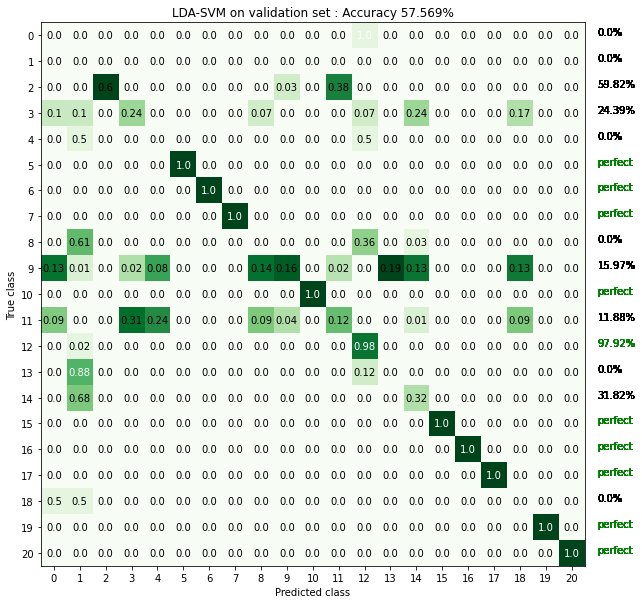

In [69]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on validation set',save_fig_name='PDF/LDA-SVM confusion matrix Validation.pdf')
pass

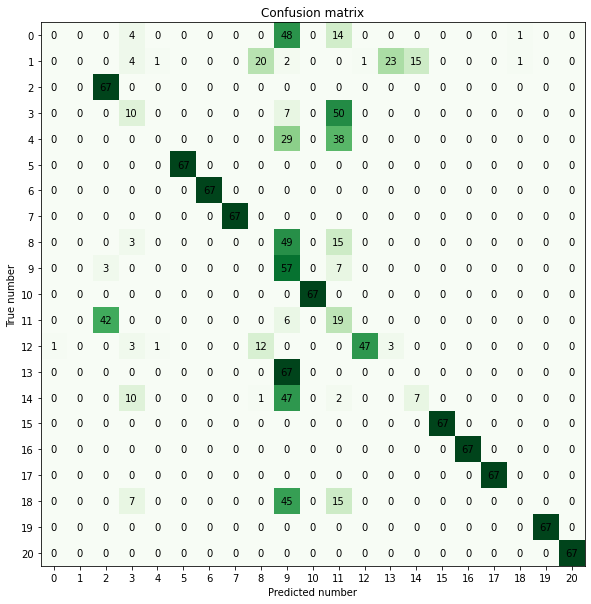

In [66]:
#confusion matrix
numbers = targets
truth = labels_tst


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict_tst)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict_tst[i]))] += 1

#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix")
plt.yticks(numbers)
plt.xticks(numbers)

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')